In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(1309, 13)

In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.shape

(1309, 12)

In [6]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


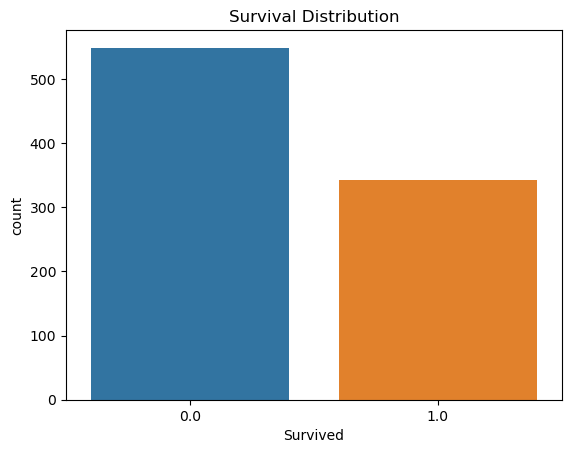

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Survived
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()

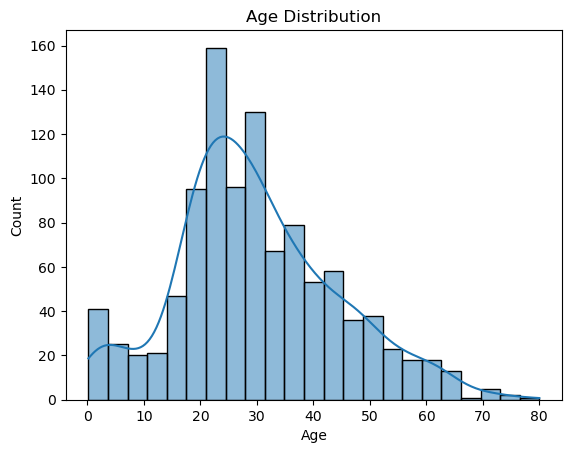

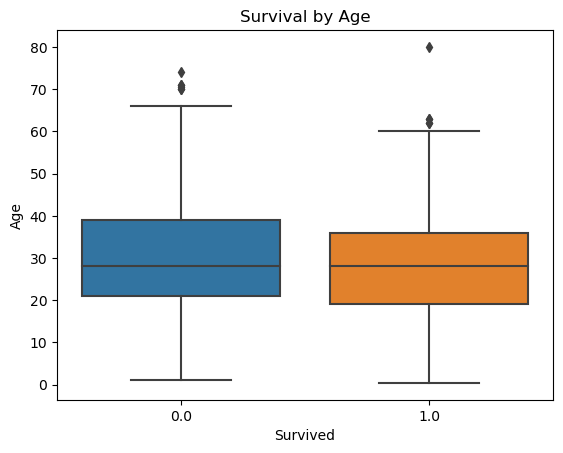

In [10]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Relationship between Age and Survival
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Survival by Age')
plt.show()


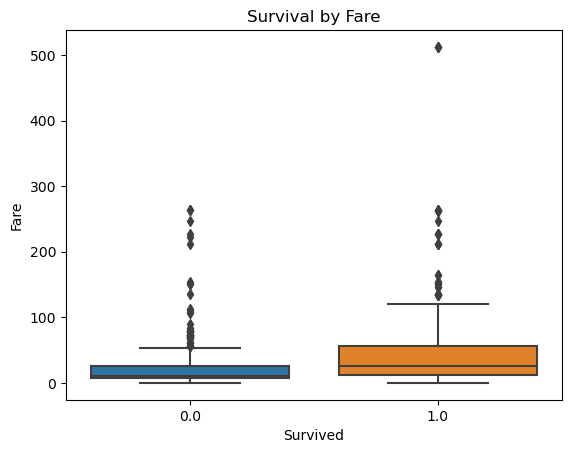

In [11]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Survival by Fare')
plt.show()


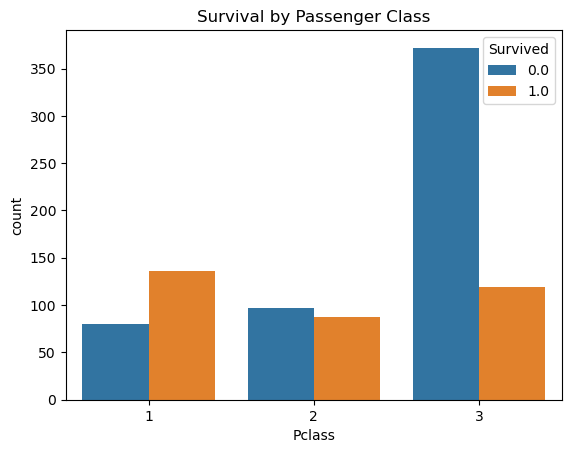

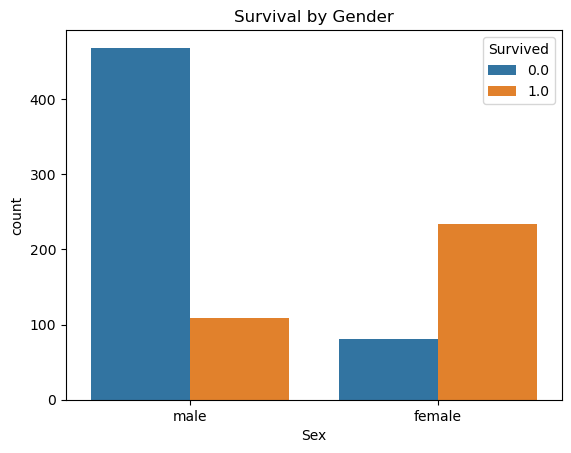

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

In [13]:
# Fill missing Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Fill missing Fare (if any)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [14]:
# One-hot encode Embarked
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Encode Sex column
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [15]:
# You may want to standardize features like Fare and Age.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


In [16]:
# Drop columns that won't be used in the model
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [17]:
''' We when checked above knew there are missing values in the target y(survived) so we 
need to deal with it first '''

# Fill missing Survived values with the most frequent value (mode)

data['Survived'].fillna(data['Survived'].mode()[0], inplace=True)

In [18]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split data into X and y
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Elastic Net to perform feature selection
elastic_net = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train)

# Get selected features
coef = np.where(elastic_net.coef_ != 0)[0]
selected_features = X.columns[coef]

print("Selected features by Elastic Net:", selected_features)


Selected features by Elastic Net: Index(['PassengerId', 'Pclass', 'Sex'], dtype='object')


In [19]:
# Split data into X and y
X = data[['PassengerId', 'Pclass', 'Sex']]
y = data['Survived']

Accuracy: 0.81
[[168  21]
 [ 29  44]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       189
         1.0       0.68      0.60      0.64        73

    accuracy                           0.81       262
   macro avg       0.76      0.75      0.75       262
weighted avg       0.80      0.81      0.81       262



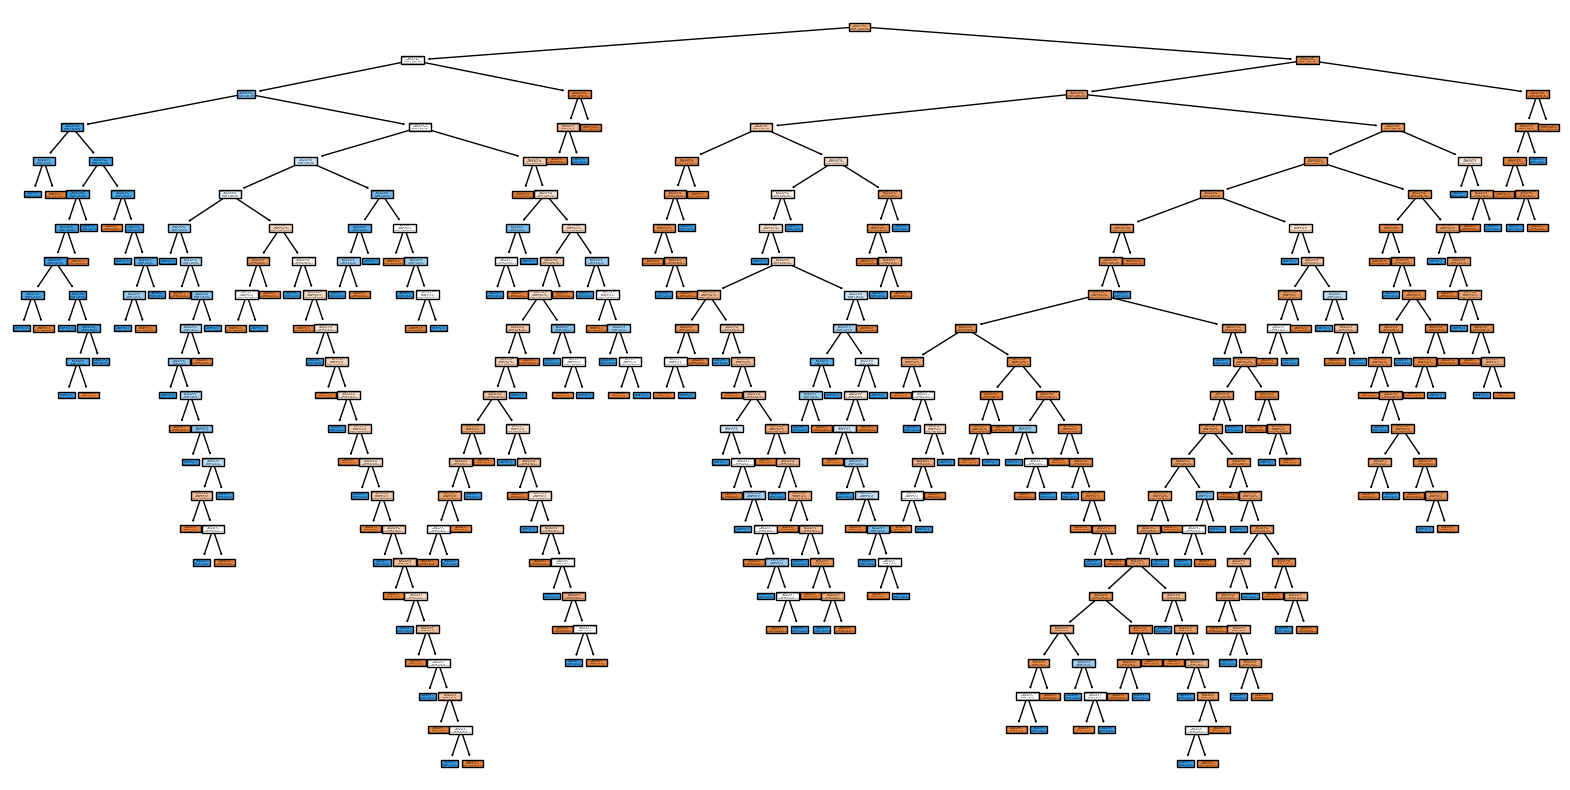

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [21]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [22]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [23]:
X = data.drop(columns=['Survived'])
y = data['Survived']

In [27]:
X.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

Accuracy: 0.82
[[164  25]
 [ 22  51]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       189
         1.0       0.67      0.70      0.68        73

    accuracy                           0.82       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.82      0.82      0.82       262



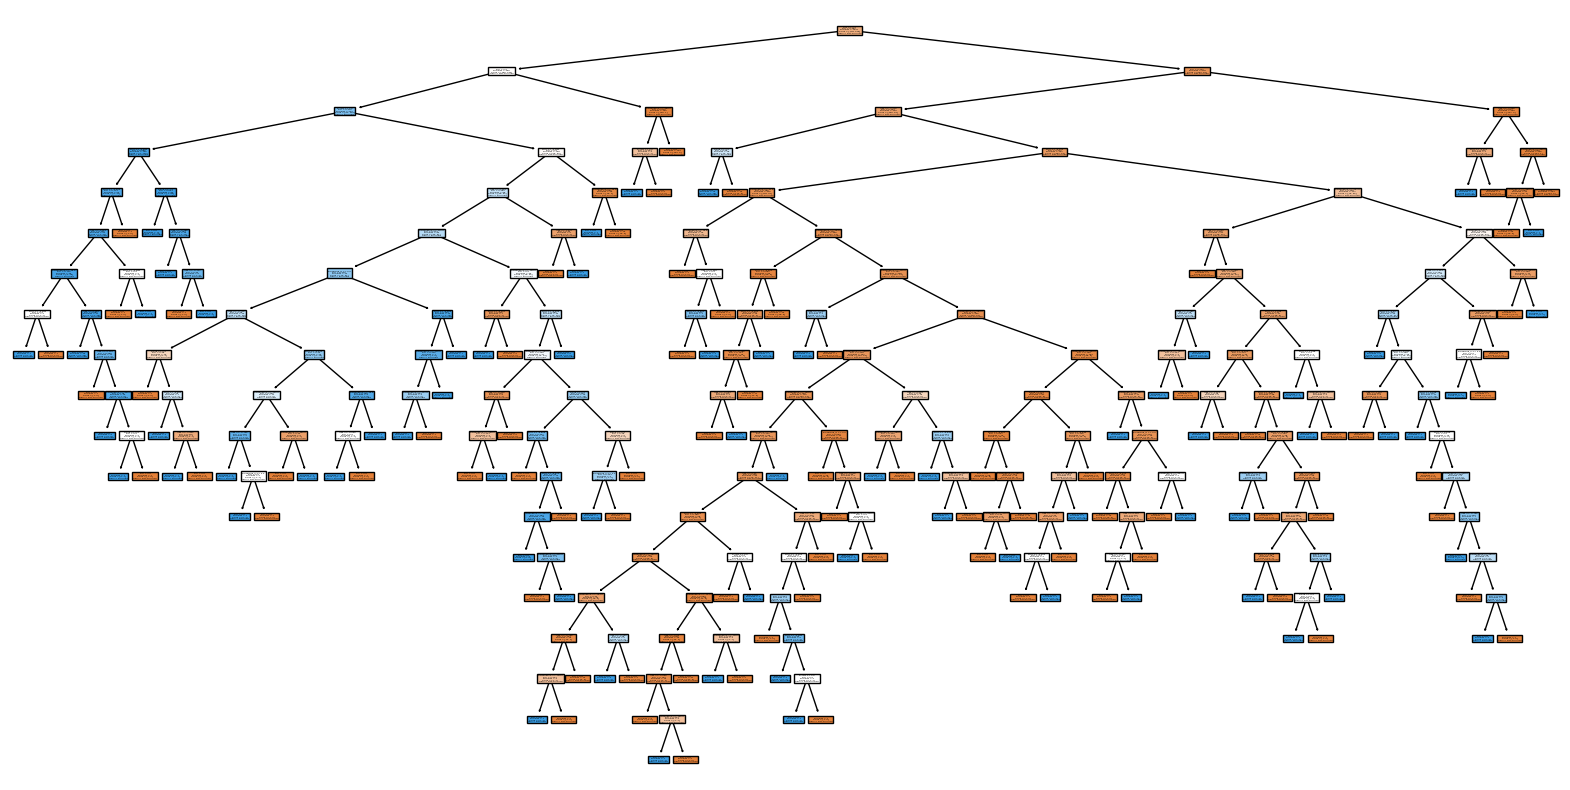

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

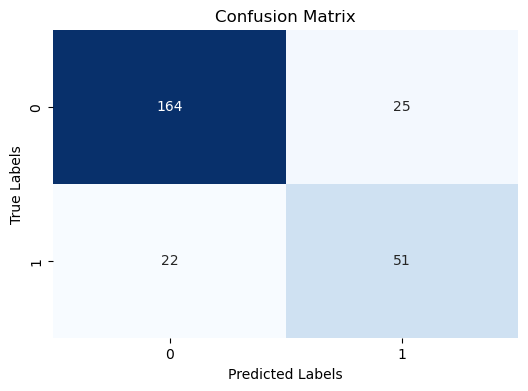

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and titles
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


In [31]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'PassengerId': data.loc[X_test.index, 'PassengerId'],  # Use the indices to match
    'Predicted_Survived': y_pred
})
print(predictions_df)

# Merge predictions with the original DataFrame
final_df = data.merge(predictions_df, on='PassengerId', how='inner')

# Save the final DataFrame to a CSV file
final_df.to_csv('titanic_with_predictions.csv', index=False)

# Optional: View the columns in the final DataFrame
print(final_df[['PassengerId', 'Survived', 'Predicted_Survived']].tail())

      PassengerId  Predicted_Survived
1148         1149                 0.0
1049         1050                 0.0
982           983                 0.0
808           809                 0.0
1195         1196                 0.0
...           ...                 ...
572           573                 1.0
140           141                 1.0
1182         1183                 0.0
312           313                 1.0
199           200                 1.0

[262 rows x 2 columns]
     PassengerId  Survived  Predicted_Survived
257         1293       0.0                 0.0
258         1294       0.0                 0.0
259         1296       0.0                 0.0
260         1299       0.0                 0.0
261         1302       0.0                 0.0
